# DDM

- This notebook creates methods figures and results figures from the DDM simulation (run_DDM)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
from scipy.stats import t
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as mticker


sns.set(style='white')
sns.set_context("poster")

In [17]:
def biased_random():
    return np.random.choice([0, 1], p=[0.25, 0.75])

def signal(time, onset):
    return 1 if time >= onset else 0


def cost(x, max_value):
    c_func = 0.06 * math.exp(0.5 * x) # was .09
    cost = c_func / max_value
    return cost

def benefit(x, interval_end):
    x = x / interval_end
    return 1 / (1 + math.exp(-7 * x))


def gain(onset, interval, max_control_value):
    gain = (benefit(onset,interval) - cost(onset, max_control_val))
    return gain

### Simulate One trial, 10 s task

rt 0.6699999999998809


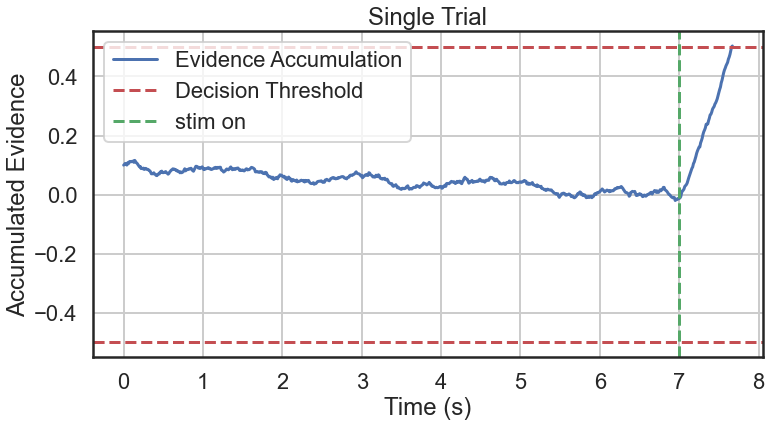

In [18]:
### DYNAMIC VARS ### 
interval = 10
max_control_val = 10
onset = 7
non_decision_time = onset  # t_er: Non-decision time (time not related to evidence accumulation)
trial_type = 1 ## congruent / incongruent

# Define DDM parameters
drift_rate = 0         # v: Drift rate (rate of evidence accumulation)
decision_threshold = .5 # a: Decision threshold
starting_point = .1    # z: intial bias for the right side is positive, left side is negative
dt = 0.01                # Time step for the simulation
stim_on = 0

# Initialize lists to store the evidence and time for plotting
evidence_list = []
time_list = []

# Simulate one trial
evidence = starting_point
time = 0.0

# Simulate evidence accumulation process until a boundary is reached
while np.abs(evidence) < decision_threshold:
    stim_on = signal(time, onset)

    if stim_on == 1:
        drift_rate = gain(onset, interval, max_control_val) if trial_type == 1 else -gain(onset, interval, max_control_val)
    else:
        drift_rate = 0
        
    #drift_rate = gain(time, interval, max_control_val, stim_on)
    evidence_list.append(evidence)
    time_list.append(time)
    # Update evidence with drift and noise
    evidence += drift_rate * dt + np.random.normal(0, np.sqrt(.00001))
    time += dt

# Record the final evidence and time when decision threshold is reached
evidence_list.append(evidence)
time_list.append(time)
print('rt',time - non_decision_time)

# Plot the evidence accumulation over time
plt.figure(figsize=(12, 6))
plt.plot(time_list, evidence_list, label='Evidence Accumulation')
plt.axhline(y=decision_threshold, color='r', linestyle='--', label='Decision Threshold')
plt.axhline(y=-decision_threshold, color='r', linestyle='--')
plt.axvline(x=onset, color='g', linestyle='--', label='stim on')
plt.title('Single Trial')
plt.xlabel('Time (s)')
plt.ylabel('Accumulated Evidence')
plt.legend()
plt.grid(True)
plt.show()


No handles with labels found to put in legend.


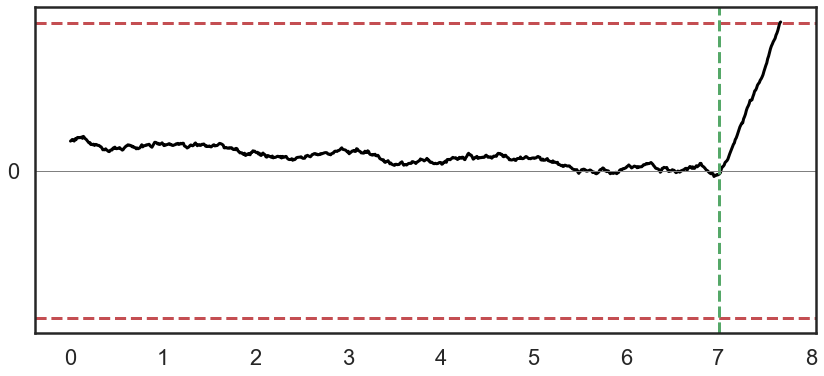

In [19]:
# Plot the evidence accumulation over time
plt.figure(figsize=(14, 6))  # Larger figure

# Plot the evidence
plt.plot(time_list, evidence_list, color='black')

# Draw decision thresholds
plt.axhline(y=decision_threshold, color='r', linestyle='--')
plt.axhline(y=-decision_threshold, color='r', linestyle='--')

# Draw stim onset line
plt.axvline(x=onset, color='g', linestyle='--')

# Add horizontal line at y = 0
plt.axhline(y=0.0, color='gray', linestyle='-', linewidth=1)

# Clean up the plot
plt.grid(False)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.yticks([0.0])  # Only show 0.0 on y-axis
plt.legend().remove()  # Remove legend
#plt.savefig('DDM_figure1.png')

plt.show()


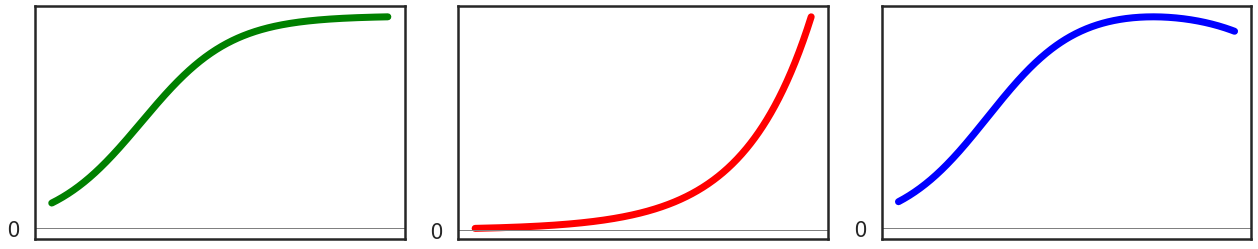

In [20]:
# Define functions
def cost(x, max_value):
    c_func = 0.06 * math.exp(0.5 * x - 2)
    return c_func / max_value

def benefit(x, interval_end):
    x = x / interval_end
    return 1 / (1 + math.exp(-7.5 * x + 2))

# Parameters
interval_end = 10
max_value = 10
x_vals = np.linspace(0, interval_end, 500)

# Compute values
cost_vals = np.array([cost(x, max_value) for x in x_vals])
benefit_vals = np.array([benefit(x, interval_end) for x in x_vals])
combined_vals = benefit_vals - cost_vals

# Common styling function
def style_ax(ax):
    ax.axhline(y=0.0, color='gray', linestyle='-', linewidth=1)
    ax.set_yticks([0.0])
    ax.set_xticks([])
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(False)
    if ax.get_legend():
        ax.get_legend().remove()

# Plot each function
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot benefit
axes[0].plot(x_vals, benefit_vals, color='green', linewidth=7)
axes[0].set_title('Benefit Function')
style_ax(axes[0])

# Plot cost
axes[1].plot(x_vals, cost_vals, color='red', linewidth=7)
axes[1].set_title('Cost Function')
style_ax(axes[1])

# Plot combined first
axes[2].plot(x_vals, combined_vals, color='blue', linewidth=7)
axes[2].set_title('Benefit – Cost')
style_ax(axes[2])

plt.tight_layout()
#plt.savefig('DDM_figure2.png', bbox_inches='tight', dpi=300)
plt.show()


## data from simulation (run_DDM)

In [21]:
###### LOAD #######
big_df = pd.read_csv('FINAL_results_ogcostbenefit_0.4_0.05_7.5_0.4_0.0001_1.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'FINAL_results_ogcostbenefit_0.4_0.05_7.5_0.4_0.0001_1.csv'

In [22]:
df = big_df

# Group by subject and compare Rand Tim to previous trial
df['previous Rand Tim'] = df['onset'].shift(1)
df['previous trial'] = (df['onset'] >= df['previous Rand Tim']).astype(int) ## 0 is longer before, 1 is shorter before

# Drop the first trial per subject (no previous trial)
df = df.dropna(subset=['previous Rand Tim']).reset_index(drop=True)

# Optional: drop the helper column if you no longer need it
df = df.drop(columns='previous Rand Tim')
df

,Unnamed: 0,rt,onset,trial_type,task,previous trial
0,1,0.304806,0.335194,valid,1,0
1,2,0.435540,0.414460,valid,1,1
2,3,0.259234,0.860766,valid,1,1
3,4,0.441299,0.488701,valid,1,0
4,5,0.342471,0.517529,valid,1,1
...,...,...,...,...,...,...
7981,7982,0.286732,5.143268,valid,10,0
7982,7983,0.793219,0.786781,invalid,10,0
7983,7984,0.571935,6.778065,invalid,10,1
7984,7985,0.570087,8.379913,valid,10,1


### by task

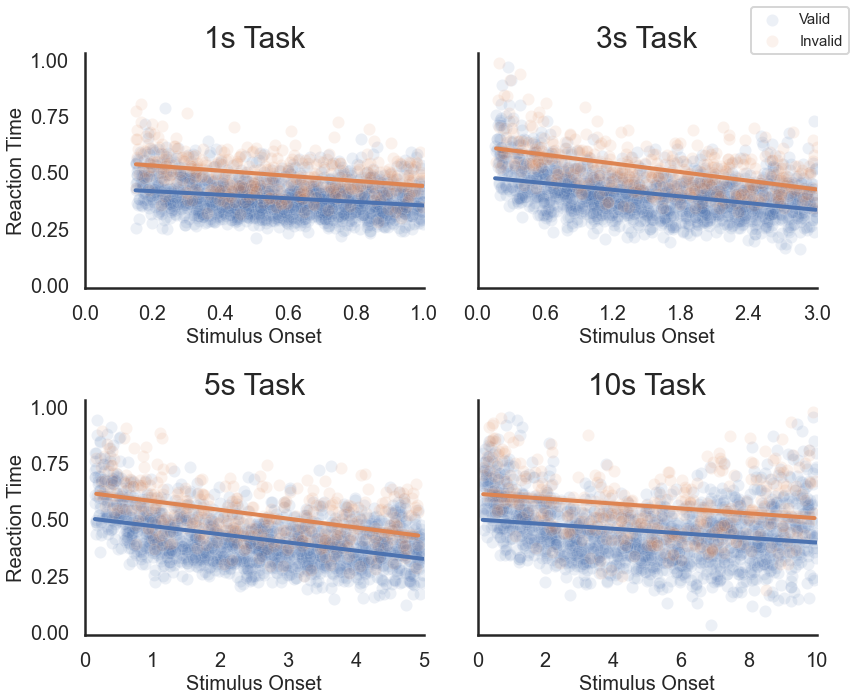

In [12]:
# Create a 2x2 subplot grid for each interval condition
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

# Define unique interval conditions from big_df
interval_list = big_df['task'].unique()
interval_list.sort()  # Ensure intervals are in ascending order

# Iterate over each interval condition in big_df
for i, interval in enumerate(interval_list):
    # Filter the DataFrame for the current interval
    df = big_df[big_df['task'] == interval]

    # Remove extreme reaction times for clarity
    df = df[df['rt'] <= 5]

    # Determine row and column indices for the subplot
    row = i // 2
    col = i % 2

    # Scatter plot for valid trials
    sns.scatterplot(data=df[df['trial_type'] == 'valid'], x='onset', y='rt', alpha=0.1, 
                    ax=axes[row, col], label='Valid', legend=False)
    sns.regplot(data=df[df['trial_type'] == 'valid'], x='onset', y='rt', scatter=False, 
                ax=axes[row, col], line_kws={"linewidth": 4})

    # Scatter plot for invalid trials
    sns.scatterplot(data=df[df['trial_type'] == 'invalid'], x='onset', y='rt', alpha=0.1, 
                    ax=axes[row, col], label='Invalid', legend=False)
    sns.regplot(data=df[df['trial_type'] == 'invalid'], x='onset', y='rt', scatter=False, 
                ax=axes[row, col], line_kws={"linewidth": 4})

    # Set title, labels, and tick parameters
    axes[row, col].set_title(f'{interval}s Task', fontsize=30)
    axes[row, col].set_xlabel('Stimulus Onset', fontsize=20)
    axes[row, col].set_ylabel('Reaction Time', fontsize=20)
    axes[row, col].tick_params(axis='x', labelsize=20)
    axes[row, col].tick_params(axis='y', labelsize=20)

    # Set x-ticks with 5 divisions, including the endpoint
    x_ticks = np.arange(0, interval + interval / 5, step=interval / 5)
    axes[row, col].set_xticks(x_ticks)

# Add a global legend with handles and labels from the last subplot
handles, labels = axes[row, col].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=15)

# Adjust layout and display
plt.tight_layout()
sns.despine()
plt.show()


### First half of the trial, second half of the trial, binned

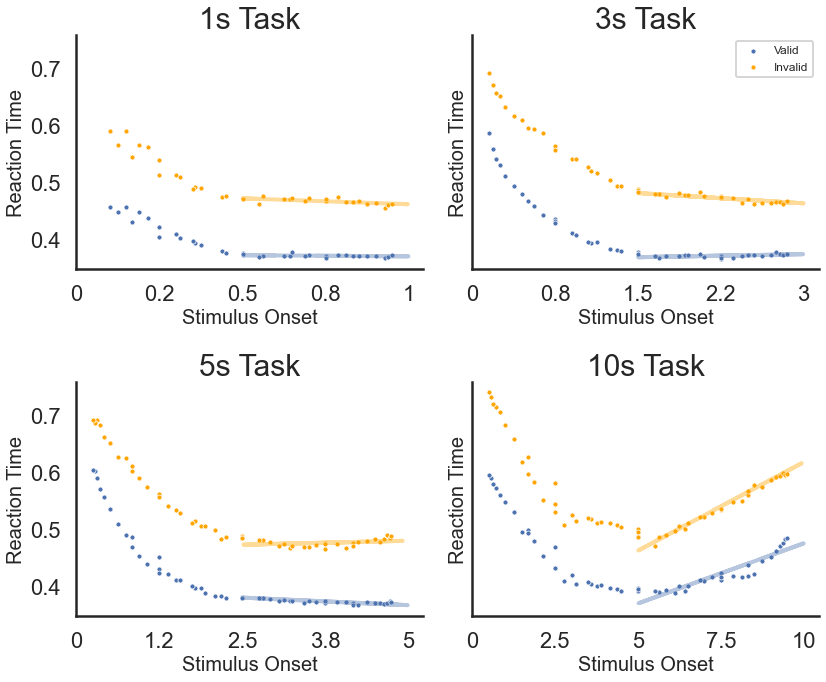

In [13]:

# Define functions if not already defined
def get_binned_rt(dat_con, dat_inc, intervals):
    avs_con = []
    avs_incon = []
    for i in range(1, len(intervals)):
        av_con = dat_con['rt'][(dat_con['onset'] > intervals[i-1]) & (dat_con['onset'] < intervals[i])].mean()
        av_inc = dat_inc['rt'][(dat_inc['onset'] > intervals[i-1]) & (dat_inc['onset'] < intervals[i])].mean()
        avs_con.append(av_con)
        avs_incon.append(av_inc)
    return avs_con, avs_incon

def fit_partial_model(data, cond_len):
    X = np.array(data['onset'][data['onset'] > (cond_len / 2)]).reshape(-1, 1)
    y = data['rt'][data['onset'] > (cond_len / 2)]
    model = LinearRegression()
    model.fit(X, y)
    return X, model.coef_, model.intercept_

def custom_round_ticks(x_ticks):
    return [f"{tick:.1f}".rstrip('0').rstrip('.') for tick in x_ticks]

# Define parameters
target_conditions = [1, 3, 5, 10]
bin_list = np.arange(2, 11, dtype=int)
s1 = 30
s2 = 20

# Create plot structure
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

# Iterate over each condition
for i, cond in enumerate(target_conditions):
    avs_con, avs_incon, x_vals = [], [], []

    # Separate data for 'valid' and 'invalid' trials
    dat_con = big_df[(big_df['trial_type'] == 'valid') & (big_df['task'] == cond)]
    dat_inc = big_df[(big_df['trial_type'] == 'invalid') & (big_df['task'] == cond)]

    # Fit regression models
    c_x_data, c_beta, c_int = fit_partial_model(dat_con, cond)
    i_x_data, i_beta, i_int = fit_partial_model(dat_inc, cond)

    for num_bins in bin_list:
        fac = cond / num_bins
        intervals = np.arange(0, cond + fac, fac)
        xlab = np.arange(fac / 2, cond, fac)
        
        avs_c, avs_inc = get_binned_rt(dat_con, dat_inc, intervals)

        if len(xlab) != len(avs_c):
            continue

        avs_con = np.hstack((avs_con, avs_c))
        avs_incon = np.hstack((avs_incon, avs_inc))
        x_vals = np.hstack((x_vals, xlab))

    # Plot
    row, col = i // 2, i % 2
    sns.scatterplot(x=x_vals, y=avs_con, label='Valid', ax=axes[row, col], color='b', s=25, legend=False)
    sns.scatterplot(x=x_vals, y=avs_incon, label='Invalid', ax=axes[row, col], color='orange', s=25, legend=False)

    # Fit lines
    axes[row, col].plot(c_x_data, c_beta[0] * c_x_data + c_int, color='b', linewidth=4, alpha=.4)
    axes[row, col].plot(i_x_data, i_beta[0] * i_x_data + i_int, color='orange', linewidth=4, alpha=.4)

    # Titles and labels
    axes[row, col].set_title(f'{cond}s Task', fontsize=s1)
    axes[row, col].set_xlabel('Stimulus Onset', fontsize=s2)
    axes[row, col].set_ylabel('Reaction Time', fontsize=s2)

    # Adjust x-ticks
    x_ticks = np.arange(0, cond + cond/4, step=cond / 4)
    axes[row, col].set_xticks(x_ticks)
    axes[row, col].set_xticklabels(custom_round_ticks(x_ticks))

    if i == 1:
        axes[row, col].legend(loc='upper right', fontsize=12)

plt.tight_layout()
sns.despine()
#plt.savefig('sliding_window.png')
plt.show()


### Task x Foreperiod x Valid-Invalid

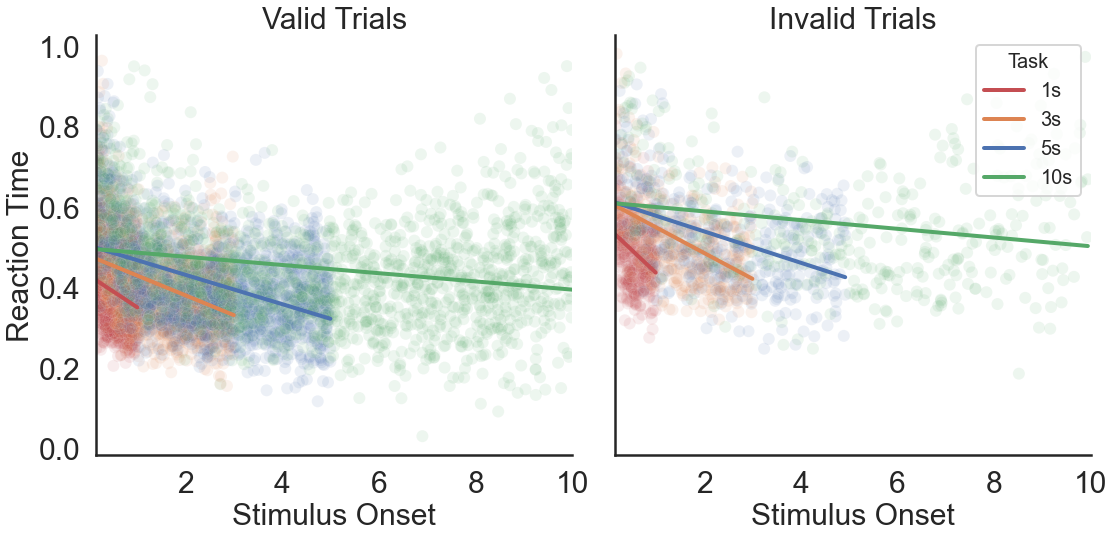

In [14]:


# Set plot size and font sizes
s1 = 30
s2 = 20
sns.set(style='white')
sns.set_context("poster")

# Get the default color palette from Seaborn
palette = sns.color_palette()  # This gives you a list of default colors

# Define colors for each task length using the default Seaborn colors
color_mapping = {
    1: palette[3],   # Default first color
    3: palette[1],   # Default second color
    5: palette[0],   # Default third color
    10: palette[2]   # Default fourth color
}

# Create two subplots side by side for valid and invalid trials
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Define legend order for task lengths
legend_order = [1, 3, 5, 10]

# Iterate over the unique 'trial_type' values ('valid' and 'invalid')
for i, trial_type in enumerate(['valid', 'invalid']):
    if trial_type == 'invalid':
        l = 'Invalid Trials'
    else:
        l = 'Valid Trials'
        
    # Subset data for the current 'trial_type' value
    data = big_df[big_df['trial_type'] == trial_type]
    
    # Scatter plot of 'onset' vs 'rt' colored by 'task' length
    sns.scatterplot(
        data=data, 
        x='onset', 
        y='rt', 
        hue='task', 
        palette=color_mapping, 
        alpha=0.1, 
        ax=axes[i]
    )
    
    # Plot separate regression lines for each 'task' length with specified colors
    for task in data['task'].unique():
        task_data = data[data['task'] == task]
        sns.regplot(
            data=task_data, 
            x='onset', 
            y='rt', 
            scatter=False, 
            ax=axes[i], 
            line_kws={"linewidth": 4, "color": color_mapping[task]}, 
            ci=None, 
            label=f'{task}s'
        )

    # Set title, labels, and tick sizes
    axes[i].set_title(f'{l}', fontsize=s1)
    axes[i].set_xlabel('Stimulus Onset', fontsize=s1)
    axes[i].tick_params(axis='x', labelsize=s1)
    axes[i].tick_params(axis='y', labelsize=s1)
    axes[i].set_xticks([2, 4, 6, 8, 10])

# Set a common y-axis label for both subplots
axes[0].set_ylabel('Reaction Time', fontsize=s1)

# Customize the legend for the second subplot (axes[1])
handles, labels = axes[1].get_legend_handles_labels()
ordered_handles = [handles[labels.index(f'{task}s')] for task in legend_order if f'{task}s' in labels]
ordered_labels = [f'{task}s' for task in legend_order if f'{task}s' in labels]

# Place the legend only on the second graph, with custom ordering and fontsize
axes[1].legend(ordered_handles, ordered_labels, title='Task', fontsize=s2, title_fontsize=s2, loc='upper right')

# Remove the legend from the first graph
axes[0].get_legend().remove()

# Adjust layout and display the plots
plt.tight_layout()
sns.despine()
#plt.savefig('validXinvalid.png')
plt.show()


### sequential effect

In [26]:
# Plot settings
sns.set(style="white")
sns.set_context("poster")

# Trial categories: 0 = previous trial longer, 1 = previous trial shorter
prev_trial_vals = [0, 1]
titles = ['When the previous trial was\nLONGER', 'When the previous trial was\nSHORTER']
conditions = [1,3,5,10]
legend_order = [10,5,3,1]
colors = {10: 'tab:green', 5: 'tab:blue', 3: 'tab:orange', 1: 'tab:red'}

s1 = 30  # font size large
s2 = 20  # font size medium

def get_sliding_window_rt(subset, window_size=0.1, step_size=0.02, start=0.15):
    """
    Compute mean and SEM of RTs using a sliding window across normalized onset times.
    
    Parameters:
    - subset: DataFrame containing 'Rand Tim' and 'key_resp.rt'
    - window_size: width of the sliding window (in normalized units)
    - step_size: step between windows (in normalized units)
    - start: starting point for the first window (in normalized units)
    
    Returns:
    - x_vals: center of each window (normalized)
    - means: mean RTs per window
    - sems: SEM of RTs per window
    """
    norm_onset = subset['onset'] / subset['task'].astype(str).str.rstrip('s').astype(float)
    rt = subset['rt']
    
    x_vals = []
    means = []
    sems = []
    
    current_start = start
    while current_start + window_size <= 1.0:
        current_end = current_start + window_size
        in_window = (norm_onset >= current_start) & (norm_onset < current_end)
        window_rts = rt[in_window]
        
        if len(window_rts) > 1:
            x_vals.append((current_start + current_end) / 2)
            means.append(window_rts.mean())
            sems.append(window_rts.std() / np.sqrt(len(window_rts)))
        
        current_start += step_size
    
    return np.array(x_vals), np.array(means), np.array(sems)

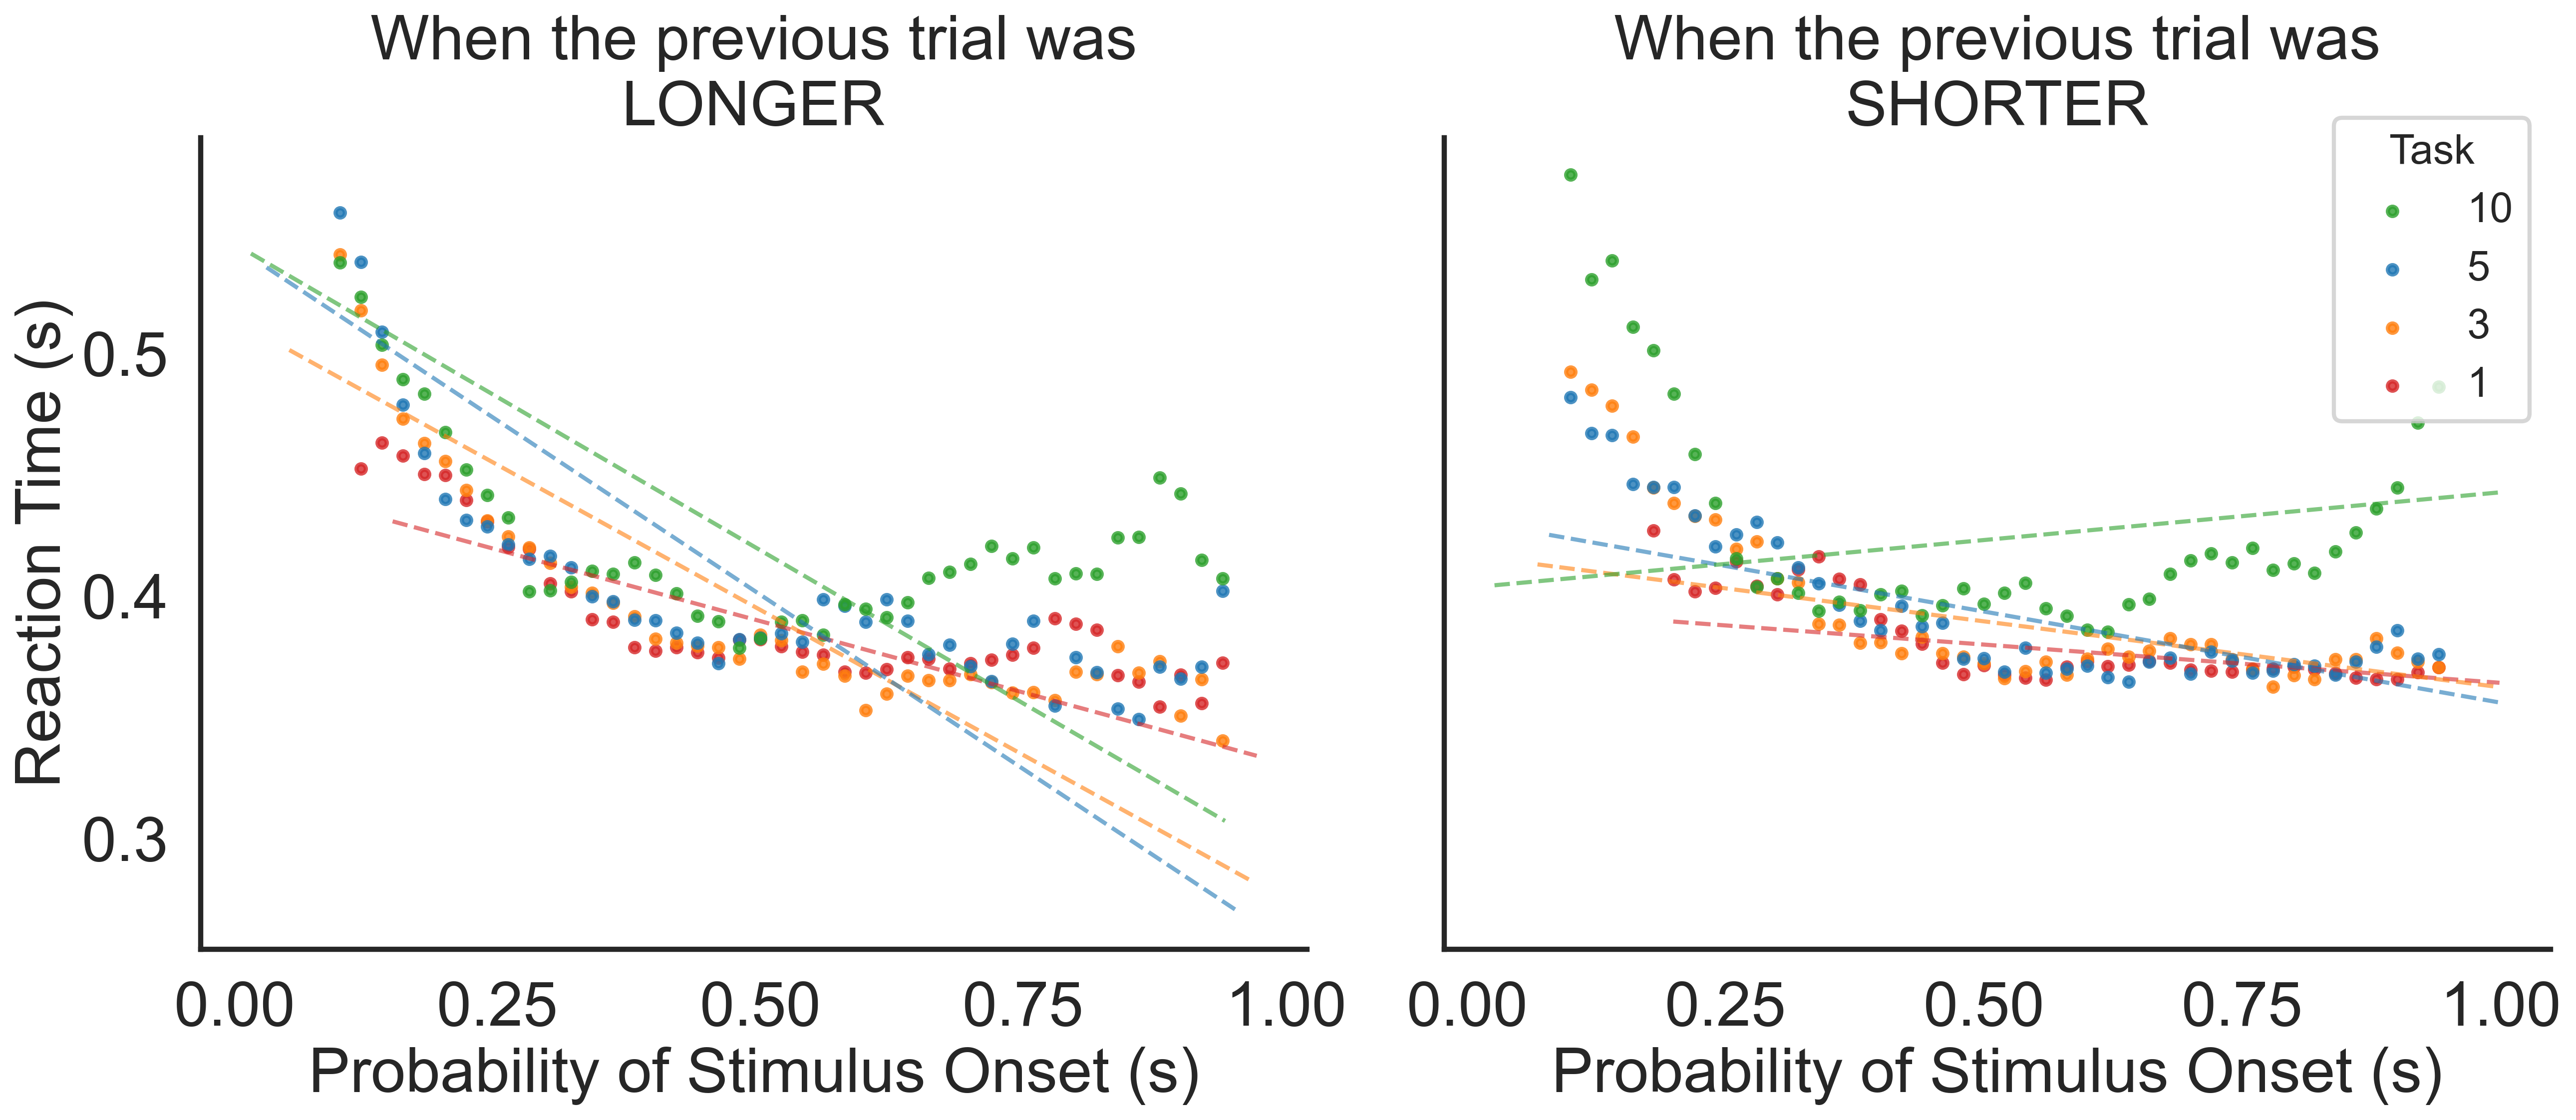

In [32]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True, dpi=300)

# Iterate over trial categories
for i, prev_val in enumerate(prev_trial_vals):
    ax = axes[i]

    for cond in conditions:
        color = colors[cond]
        subset = df[(df['task'] == cond) & (df['previous trial'] == prev_val)]
        subset = df[(df['task'] == cond) & (df['previous trial'] == prev_val) & (df['trial_type'] == 'valid')]

        if subset.empty:
            continue

        x_vals, means, sems = get_sliding_window_rt(subset, window_size=0.1, step_size=0.02, start=0.05)
        ax.scatter(x_vals, means, color=color, label=cond, alpha=0.8,s=20)

        # Fit regression line on original (non-binned) data
        onset = subset['onset'].values.reshape(-1, 1) / cond  # Normalize onset
        rt = subset['rt'].values.reshape(-1, 1)

        if len(onset) > 1:  # avoid fitting on too few points
            reg = LinearRegression().fit(onset, rt)
            x_line = np.linspace(onset.min(), onset.max(), 100).reshape(-1, 1)
            y_line = reg.predict(x_line)
            ax.plot(x_line, y_line, color=color, linestyle='--', linewidth=2, alpha=0.6)

        ax.tick_params(axis='x', labelsize=s1)
        ax.tick_params(axis='y', labelsize=s1)
        ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))

    ax.set_title(titles[i], fontsize=s1)
    ax.set_xlabel('Probability of Stimulus Onset (s)', fontsize=s1)
    if i == 0:
        ax.set_ylabel('Reaction Time (s)', fontsize=s1)

    if i == 1:
        handles, labels = ax.get_legend_handles_labels()
        reordered_handles = [handles[conditions.index(cond)] for cond in legend_order if cond in conditions]
        reordered_labels = [labels[conditions.index(cond)] for cond in legend_order if cond in conditions]
        ax.legend(reordered_handles, reordered_labels, title='Task', fontsize='small', title_fontsize='small',
                  loc='upper right', bbox_to_anchor=(1, 1.05))

plt.tight_layout()
sns.despine()
#plt.savefig('seq_effect_binned_rt_INVAL-model.png')
plt.show()


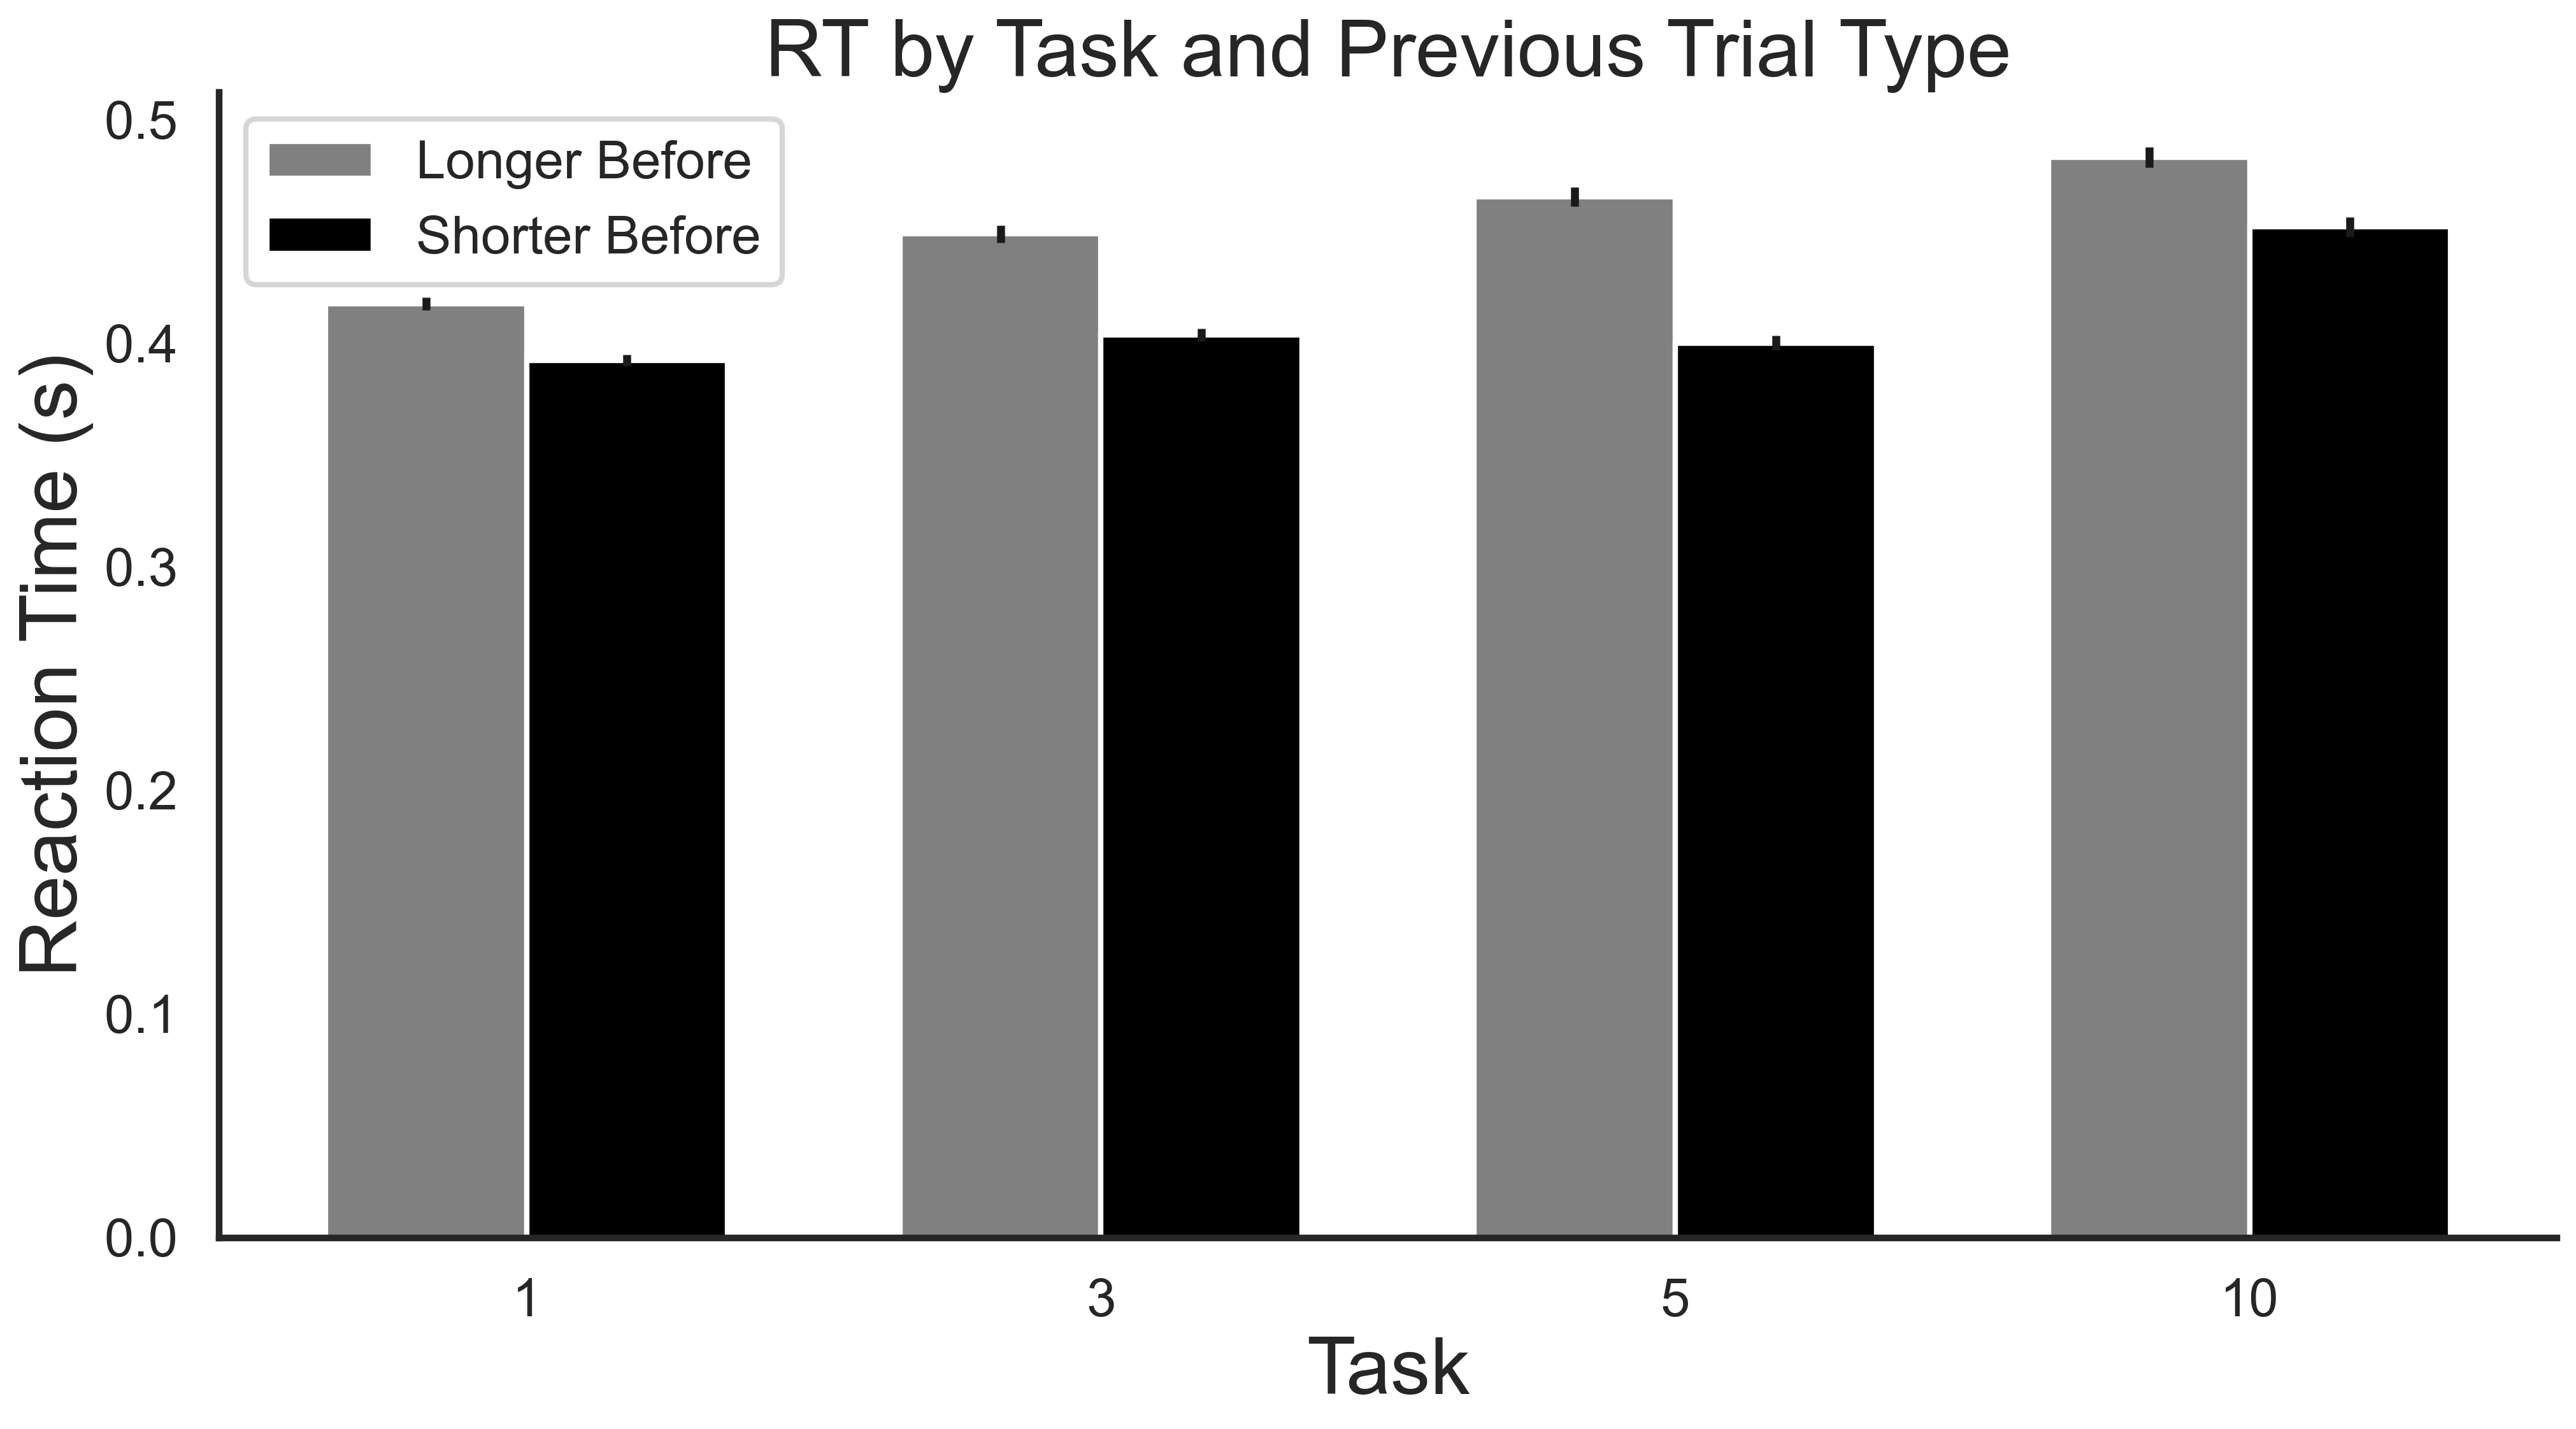

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set(style="white")
sns.set_context("poster")

# Trial categories: 0 = previous trial longer, 1 = previous trial shorter
prev_labels = ['Longer Before', 'Shorter Before']
conditions = [1, 3, 5, 10]
legend_order = ['10s', '5s', '3s', '1s']
colors = {'10s': 'tab:green', '5s': 'tab:blue', '3s': 'tab:orange', '1s': 'tab:red'}

s1 = 30  # font size large
s2 = 20  # font size medium

# Prepare data for barplot
bar_heights = []
bar_errors = []

for cond in conditions:
    cond_means = []
    cond_sems = []
    for prev_val in [0, 1]:  # 0 = longer before, 1 = shorter before
        subset = df[(df['task'] == cond) & (df['previous trial'] == prev_val)]
        if subset.empty:
            cond_means.append(np.nan)
            cond_sems.append(np.nan)
        else:
            rt_vals = subset['rt'].values
            cond_means.append(np.mean(rt_vals))
            cond_sems.append(np.std(rt_vals) / np.sqrt(len(rt_vals)))  # SEM

    bar_heights.append(cond_means)
    bar_errors.append(cond_sems)

# Convert to NumPy arrays for easier plotting
bar_heights = np.array(bar_heights)  # shape (num_conditions, 2)
bar_errors = np.array(bar_errors)

# Set up plot
fig, ax = plt.subplots(figsize=(14, 8), dpi=300)
x = np.arange(len(conditions))  # the label locations
width = 0.35  # width of the bars

# Plot bars
bars1 = ax.bar(x - width/2, bar_heights[:, 0], width, label='Longer Before', color='gray', yerr=bar_errors[:, 0])
bars2 = ax.bar(x + width/2, bar_heights[:, 1], width, label='Shorter Before', color='black', yerr=bar_errors[:, 1])

# Labels and ticks
ax.set_ylabel('Reaction Time (s)', fontsize=s1)
ax.set_xlabel('Task', fontsize=s1)
ax.set_title('RT by Task and Previous Trial Type', fontsize=s1)
ax.set_xticks(x)
ax.set_xticklabels(conditions, fontsize=s2)
ax.tick_params(axis='y', labelsize=s2)
ax.legend(fontsize=s2, title_fontsize=s2)

sns.despine()
plt.tight_layout()
plt.savefig('seq_effect_bars_model.png')

plt.show()
